In [1]:
import json, pickle
import pandas as pd
import torch

In [2]:
file_path = 'train_data.pkl'
with open(file_path, 'rb') as file:
    train_data = pickle.load(file)

In [3]:
relations = {}
categories = set()
comp_category_hash = {}
for doc in train_data.keys():
    for comp in sorted(train_data[doc]['components'],key=lambda x: x['object_id']):
        categories.add(comp['category'])
        comp_category_hash[comp['object_id']] = comp['category']

In [4]:
len(comp_category_hash)

43326

In [5]:
for doc in train_data.keys():
    for comp in sorted(train_data[doc]['components'],key=lambda x: x['object_id']):
        if comp['relations']['parent'] != []:
            parent_id = comp['relations']['parent'][-1]
            child_id = comp['object_id']
            k = (comp_category_hash[parent_id], comp_category_hash[child_id])
            if k in relations.keys():
                relations[k]+=1
            else:
                relations[k]=1

In [6]:
len(relations)

31

In [7]:
relations

{('summary', 'paragraph'): 1022,
 ('figure', 'figure_caption'): 2483,
 ('table', 'table_caption'): 1257,
 ('form_title', 'form_body'): 137,
 ('section', 'subsection'): 2969,
 ('subsection', 'subsubsection'): 863,
 ('section', 'paragraph'): 8084,
 ('subsubsection', 'paragraph'): 2245,
 ('paragraph', 'list'): 770,
 ('subsubsection', 'subsubsubsection'): 93,
 ('subsubsubsection', 'paragraph'): 216,
 ('subsection', 'paragraph'): 8220,
 ('subsection', 'list'): 64,
 ('summary', 'form_body'): 19,
 ('summary', 'form'): 72,
 ('abstract', 'form'): 62,
 ('abstract', 'form_body'): 29,
 ('subsection', 'form_body'): 56,
 ('subsubsection', 'form_body'): 16,
 ('section', 'list'): 52,
 ('section', 'form_body'): 44,
 ('abstract', 'paragraph'): 158,
 ('section', 'form'): 15,
 ('subsubsection', 'list'): 16,
 ('subsubsubsection', 'list'): 8,
 ('subsection', 'form'): 9,
 ('subsubsubsection', 'subsubsubsubsection'): 3,
 ('subsubsubsubsection', 'paragraph'): 4,
 ('subsubsubsection', 'form_body'): 3,
 ('subsub

In [8]:
categories

{'abstract',
 'appendix_list',
 'cross',
 'figure',
 'figure_caption',
 'form',
 'form_body',
 'form_title',
 'list',
 'list_of_figures',
 'list_of_tables',
 'other',
 'paragraph',
 'references',
 'report_title',
 'section',
 'subsection',
 'subsubsection',
 'subsubsubsection',
 'subsubsubsubsection',
 'summary',
 'table',
 'table_caption',
 'table_of_contents',
 'title'}

In [9]:
all_parents = set(map(lambda x: x[0],relations.keys()))
all_children = set(map(lambda x: x[1], relations.keys()))
cat_no_rel = [cat for cat in list(categories) if cat not in all_parents and  cat not in all_children]

In [10]:
all_parents

{'abstract',
 'figure',
 'form_title',
 'paragraph',
 'section',
 'subsection',
 'subsubsection',
 'subsubsubsection',
 'subsubsubsubsection',
 'summary',
 'table'}

In [11]:
cat_no_rel

['other',
 'report_title',
 'title',
 'table_of_contents',
 'cross',
 'list_of_tables',
 'appendix_list',
 'references',
 'list_of_figures']

In [12]:
all_children

{'figure_caption',
 'form',
 'form_body',
 'list',
 'paragraph',
 'subsection',
 'subsubsection',
 'subsubsubsection',
 'subsubsubsubsection',
 'table_caption'}

In [38]:
len(cat_no_rel)

9

In [39]:
cat_no_rel

['appendix_list',
 'list_of_tables',
 'title',
 'other',
 'cross',
 'references',
 'report_title',
 'table_of_contents',
 'list_of_figures']

In [40]:
len(relations)

31

In [13]:
all_category_without_text = set()
for doc in train_data.keys():
    for comp in train_data[doc]['components']:
        try:
            comp['text']
        except Exception as e:
            all_category_without_text.add(comp['category'])

In [14]:
all_category_without_text

{'figure', 'table'}

In [41]:
df = pd.DataFrame(comp_category_hash)

ValueError: If using all scalar values, you must pass an index

In [42]:
hist = {}
for cat in categories:
    hist[cat]=list(comp_category_hash.values()).count(cat)
    

In [43]:
hist

{'figure': 2856,
 'table': 1686,
 'abstract': 134,
 'form_body': 360,
 'appendix_list': 226,
 'figure_caption': 2573,
 'list_of_tables': 320,
 'title': 103,
 'subsubsubsubsection': 3,
 'other': 1083,
 'subsubsection': 883,
 'table_caption': 1345,
 'cross': 503,
 'form_title': 154,
 'summary': 396,
 'paragraph': 20023,
 'section': 4039,
 'form': 577,
 'references': 402,
 'report_title': 572,
 'table_of_contents': 556,
 'subsubsubsection': 93,
 'subsection': 3079,
 'list': 925,
 'list_of_figures': 435}

In [44]:
import torchvision

In [45]:
data = train_data['a070474_a70474_9979030']

In [46]:
data

{'page': {0: {'objects': {55633: {'bbox': [172, 217, 200, 66],
     'segmentation': [[372, 217, 372, 283, 172, 283, 172, 217]],
     'category_id': 1,
     'category': 'report_title',
     'page': 0,
     'relations': {'child': [],
      'parent': [],
      'above': [],
      'following': [],
      'context': [],
      'figure': [],
      'table': []},
     'object_id': 55633,
     'text': 'NORTH SHAW PROJECT\n E45/2189\n PARTIAL SURRENDER REPORT\n'},
    55634: {'bbox': [68, 344, 436, 410],
     'segmentation': [[504, 344, 504, 754, 68, 754, 68, 344]],
     'category_id': 2,
     'category': 'form',
     'page': 0,
     'relations': {'child': [],
      'parent': [],
      'above': [],
      'following': [],
      'context': [],
      'figure': [],
      'table': []},
     'object_id': 55634,
     'text': "TENEMENTS:\n E45/2189\n GROUP:\n HOLDER:\n HAOMAMINING Nl\n OPERATOR:\n Haoma Mining Nl\n ACN 008 676 177\n 411 Collins Street\n MELBOURNE VIC 3000\n COMMODITY:\n GOLD, DIAMONDS, COP

In [66]:
data['page'][0]['box_list']

[[172, 217, 200, 66], [68, 344, 436, 410]]

In [48]:
from PIL import Image
img = Image.open("/media/soham/70DE3B11DE3ACEDA/Soham's_windows/Soham/AAAI-25/aaai-25-visually-rich-document-vrd-iu-leaderboard/train/train/a070474_a70474_9979030_page-0.png").convert('RGB')

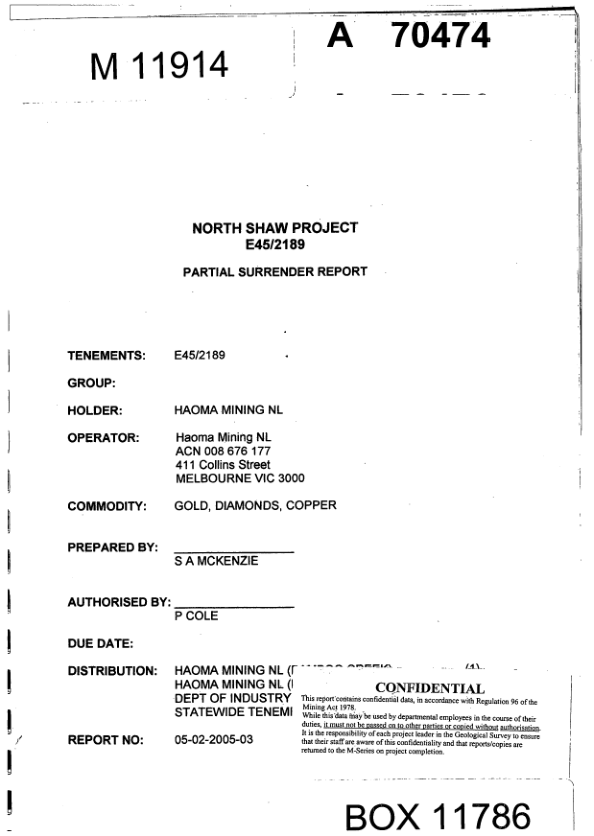

In [49]:
img

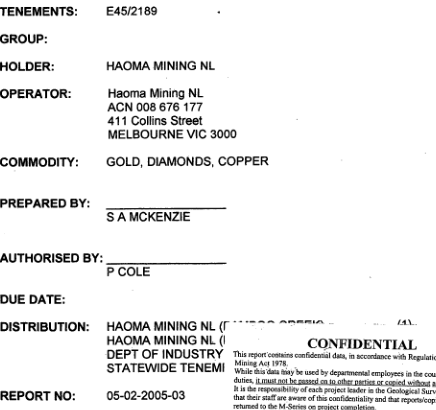

In [76]:
bbox = data['components'][1]['bbox']
torchvision.transforms.functional.crop(img,top=bbox[1],left=bbox[0],height=bbox[3],width=bbox[2])

In [71]:
bbox[2]

200

In [77]:
bbox

[68, 344, 436, 410]

In [1]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import torchvision.transforms as transforms
import pickle
from transformers import AutoImageProcessor, AutoTokenizer
class CompDataset(Dataset):
    def __init__(self, pickle_file,image_path_root):
        super().__init__()
        with open(pickle_file, 'rb') as file:
            data = pickle.load(file)
        self.components = []
        self.image_paths = []
        for k in data.keys():
            self.components.extend(data[k]['components'])
            self.image_paths.extend([ f"{os.path.join(image_path_root,k)}_page-{comp['page']}.png" for comp in data[k]['components']])

        # self.image_processor = AutoImageProcessor.from_pretrained("nielsr/donut-base")
        # self.tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")

    def __len__(self):
        return len(self.components)
    
    def __getitem__(self, index):
        comp = self.components[index]
        img = Image.open(self.image_paths[index]).convert("RGB")
        bbox = comp['bbox']
        cropped_img = transforms.functional.crop(img,top=bbox[1],left=bbox[0],height=bbox[3],width=bbox[2])
        # image_inputs = self.image_processor(cropped_img, return_tensors="pt")
        try:
            text = comp['category']+": "+comp['text']
        except:
            text = comp['category']+": "
        # text_inputs = self.tokenizer()
        return (cropped_img, text, comp['category_id'])

In [2]:
dataset = CompDataset('train_data.pkl','train/train')

In [3]:
len(dataset)

43326

In [6]:
import torch
def collate_fn(batch):
    images = [e[0] for e in batch]
    text = [e[1] for e in batch]
    labels = torch.tensor([e[2] for e in batch], dtype=torch.long)
    return (images, text, labels)

In [7]:
train_dataloader = DataLoader(dataset,batch_size=32, collate_fn=collate_fn)
for d in train_dataloader:
    print(d)
    break

([<PIL.Image.Image image mode=RGB size=288x66 at 0x7464E05855E0>, <PIL.Image.Image image mode=RGB size=426x439 at 0x7464E05850D0>, <PIL.Image.Image image mode=RGB size=116x22 at 0x7464E05855B0>, <PIL.Image.Image image mode=RGB size=371x78 at 0x7464E05854C0>, <PIL.Image.Image image mode=RGB size=371x44 at 0x7463EDAD5400>, <PIL.Image.Image image mode=RGB size=377x85 at 0x7463EDAD5190>, <PIL.Image.Image image mode=RGB size=375x61 at 0x7463EDAD50D0>, <PIL.Image.Image image mode=RGB size=417x594 at 0x7464E0585A00>, <PIL.Image.Image image mode=RGB size=308x24 at 0x7463EDAD5160>, <PIL.Image.Image image mode=RGB size=111x14 at 0x7463AB18FF10>, <PIL.Image.Image image mode=RGB size=382x665 at 0x7463AB18FA00>, <PIL.Image.Image image mode=RGB size=382x43 at 0x7463AB18F580>, <PIL.Image.Image image mode=RGB size=388x62 at 0x7463AB18F880>, <PIL.Image.Image image mode=RGB size=271x233 at 0x7463AB18F430>, <PIL.Image.Image image mode=RGB size=343x142 at 0x7463AB18FF40>, <PIL.Image.Image image mode=RGB s

In [8]:
d['img'].pixel_values.shape

torch.Size([32, 1, 3, 2560, 1920])

In [10]:
d[2].shape[0]

32